#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Practica 15:Afimación de Parámetros Alumno: Ibarra Ramírez Sergio </font>

##### Primero vamos a trabajar con la data de winequality-white.csv

In [1]:
import pandas as pd
tabla_wine = pd.read_csv('https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/winequality-white.csv', sep=';')
tabla_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Separamos en variables dependiente (y) e independientes (X)

In [2]:
y_tabla_wine = tabla_wine["quality"]
X_tabla_wine = tabla_wine.drop(["quality"],axis=1)
X_tabla_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


Separamos e train & test data 

In [3]:
from sklearn.model_selection import train_test_split

X_train_tabla_wine, X_test_tabla_wine, y_train_tabla_wine, y_test_tabla_wine = train_test_split(X_tabla_wine,y_tabla_wine,test_size=0.2,random_state = 2023)
y_test_tabla_wine

1277    5
924     8
994     6
198     5
4457    5
       ..
2705    6
3796    6
781     6
4512    6
4251    6
Name: quality, Length: 980, dtype: int64

In [4]:
y_test_tabla_wine.value_counts()

6    448
5    284
7    170
4     37
8     35
3      5
9      1
Name: quality, dtype: int64

#### Cross-validation del modelo SVC para el caso de la data de winequality-white.csv

You have a highly imbalanced class distribution, where classes 3, 4, 8, and 9 have very few instances compared to the other classes. In this case, using a regular cross-validation strategy like cv=4 may not be suitable because it can lead to unreliable performance estimation for the minority classes.

To address the imbalanced class distribution, you can consider using a stratified cross-validation strategy that ensures each fold contains a proportional representation of each class. In scikit-learn, you can achieve this using StratifiedKFold instead of specifying cv=4 directly.

##### RandomizedSearchCV para data de winequality-white.csv con modelo de clasificación SVC

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the SVC model
modelo_SVC = SVC()

# Define the hyperparameter grid for SVC
cuadricula_parametros_modelo_SVC = [{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']}]

# Create an instance of StratifiedKFold with 4 folds
stratified_cv = StratifiedKFold(n_splits=4)

# Create an instance of RandomizedSearchCV with the updated cross-validation strategy
buscadorRandom_modelo_SVC = RandomizedSearchCV(modelo_SVC, cuadricula_parametros_modelo_SVC, cv=stratified_cv, scoring='accuracy')

# Fit the RandomizedSearchCV object on the training data
buscadorRandom_modelo_SVC.fit(X_train_tabla_wine, y_train_tabla_wine)


Se define el modelo SVC y sus hiperparámetros a probar 

In [4]:
from sklearn.svm import SVC

## Se define el modelo SVC
modelo_SVC = SVC()
modelo_SVC

## Se definen los hiperparámetros del modelo SVC 
cuadricula_parametros_modelo_SVC = [{'C':[1,10,100,1000],'kernel':["linear","poly","rbf"]}]
cuadricula_parametros_modelo_SVC

[{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']}]

Se aplica el RandomizedSearchCV para determinar 'Los mejores parámetros para el modelo_SVC'

In [5]:
from sklearn.model_selection import RandomizedSearchCV

buscadorRandom_modelo_SVC = RandomizedSearchCV(modelo_SVC,cuadricula_parametros_modelo_SVC,cv=4,scoring="accuracy")
buscadorRandom_modelo_SVC

RandomizedSearchCV(cv=4, estimator=SVC(),
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'kernel': ['linear', 'poly', 'rbf']}],
                   scoring='accuracy')

In [6]:
buscadorRandom_modelo_SVC.fit(X_train_tabla_wine,y_train_tabla_wine)

In [ ]:
buscadorRandom_modelo_SVC.best_params_

##### GridSearchCV para data de winequality-white.csv con modelo de clasificación SVC

Se define el modelo SVC y sus hiperparámetros a probar 

In [7]:
from sklearn.svm import SVC

## Se define el modelo SVC
modelo_SVC = SVC()
modelo_SVC

## Se definen los hiperparámetros del modelo SVC 
cuadricula_parametros_modelo_SVC = [{'C':[1,10,100,1000],'kernel':["linear","poly","rbf"]}]
cuadricula_parametros_modelo_SVC

[{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']}]

In [11]:
from sklearn.model_selection import GridSearchCV
buscadorGrid_SCV_wine = GridSearchCV(modelo_SVC,cuadricula_parametros_modelo_SVC,cv=5,scoring="accuracy")
buscadorGrid_SCV_wine.fit(X_train_tabla_wine,y_train_tabla_wine)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


#### Cross-validation del modelo DecisionTreeClassifier para el caso de la data de winequality-white.csv

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the DecisionTreeClassifier model
arbol_clasificacion = DecisionTreeClassifier()

# Define the hyperparameter grid for DecisionTreeClassifier
cuadricula_parametros_arbol = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

# Create an instance of RandomizedSearchCV
buscadorRandom_arbol = RandomizedSearchCV(arbol_clasificacion, cuadricula_parametros_arbol, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object on the training data
buscadorRandom_arbol.fit(X_train_tabla_wine, y_train_tabla_wine)

# Print the best parameters and best score
print("Best Parameters:", buscadorRandom_arbol.best_params_)
print("Best Score:", buscadorRandom_arbol.best_score_)


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10}
Best Score: 0.5484990356295776


Se grafica el valor de ACCURACY vs max_depth para el caso de DecisionTreeClassifier aplicado al dataset de wine 

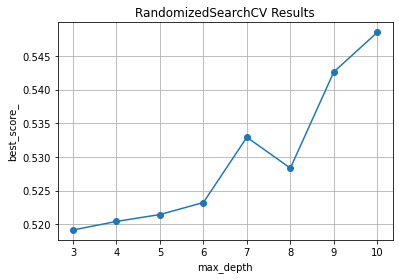

In [18]:
import matplotlib.pyplot as plt

# Get the max_depth values from the hyperparameter grid
max_depth_values = [3, 4, 5, 6, 7, 8,9,10]

# Get the best scores obtained from RandomizedSearchCV
best_scores = buscadorRandom_arbol.cv_results_['mean_test_score']

# Plot the relationship between max_depth and best_scores
plt.plot(max_depth_values, best_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('best_score_')
plt.title('RandomizedSearchCV Results')
plt.grid(True)
plt.show()


Definimos el DecisionTreeClassifier con los 'mejores parámetros obtenidos por el RandomizedSearchCV'

In [7]:
arbol_clasificacion_best_param = DecisionTreeClassifier(max_depth=7)
arbol_clasificacion_best_param

DecisionTreeClassifier(max_depth=7)

Se entrena el modelo DecisionTreeClassifier con los 'mejores parámetros obtenidos por el RandomizedSearchCV'

In [14]:
arbol_clasificacion_best_param_wine = arbol_clasificacion_best_param.fit(X_train_tabla_wine,y_train_tabla_wine)
arbol_clasificacion_best_param_wine

DecisionTreeClassifier(max_depth=7)

Se usa el modelo DecisionTreeClassifier con los 'mejores parámetros obtenidos por el RandomizedSearchCV'

In [15]:
y_pred_arbol_clasificacion_best_param_wine = arbol_clasificacion_best_param_wine.predict(X_test_tabla_wine)
y_pred_arbol_clasificacion_best_param_wine

array([5, 6, 6, 5, 5, 7, 8, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 4,
       6, 6, 7, 6, 6, 5, 6, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       6, 7, 6, 6, 7, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 5, 5,
       6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 6, 6, 7, 7, 6, 5, 7, 6, 7, 7, 5, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6, 7, 5, 5, 6, 5, 5, 6, 6, 5, 7,
       5, 5, 5, 7, 7, 7, 6, 5, 5, 6, 5, 6, 7, 6, 6, 5, 7, 6, 7, 7, 6, 5,
       6, 7, 6, 7, 7, 6, 6, 8, 7, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 7, 8,
       6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6, 4, 6, 6, 5, 5,
       6, 6, 7, 6, 6, 5, 7, 6, 6, 6, 7, 6, 6, 7, 5, 7, 6, 6, 5, 6, 6, 5,
       5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 7, 5, 5, 6, 7, 6,
       5, 6, 7, 8, 6, 5, 6, 6, 6, 6, 7, 5, 6, 7, 6, 5, 6, 6, 5, 6, 7, 6,
       7, 5, 6, 6, 5, 4, 5, 6, 6, 7, 7, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 7,
       7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6,
       5, 6, 6, 7, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 7,

Vamos a generar el reporte de métricas de la clasificación del modelo DecisionTreeClassifier con los 'mejores parámetros obtenidos por el RandomizedSearchCV'

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test_tabla_wine,y_pred_arbol_clasificacion_best_param_wine))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.44      0.11      0.17        37
           5       0.59      0.56      0.58       284
           6       0.57      0.64      0.60       448
           7       0.39      0.42      0.41       170
           8       0.30      0.09      0.13        35
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.33      0.26      0.27       980
weighted avg       0.53      0.54      0.52       980



c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Se observa en general que el DecisionTreeClassifier tiene una accuracy máximo de ~ 0.55 para la clasificación de los vinos

De igual manera se puede plotear el DecisionTreeClassifier(max_depth=)

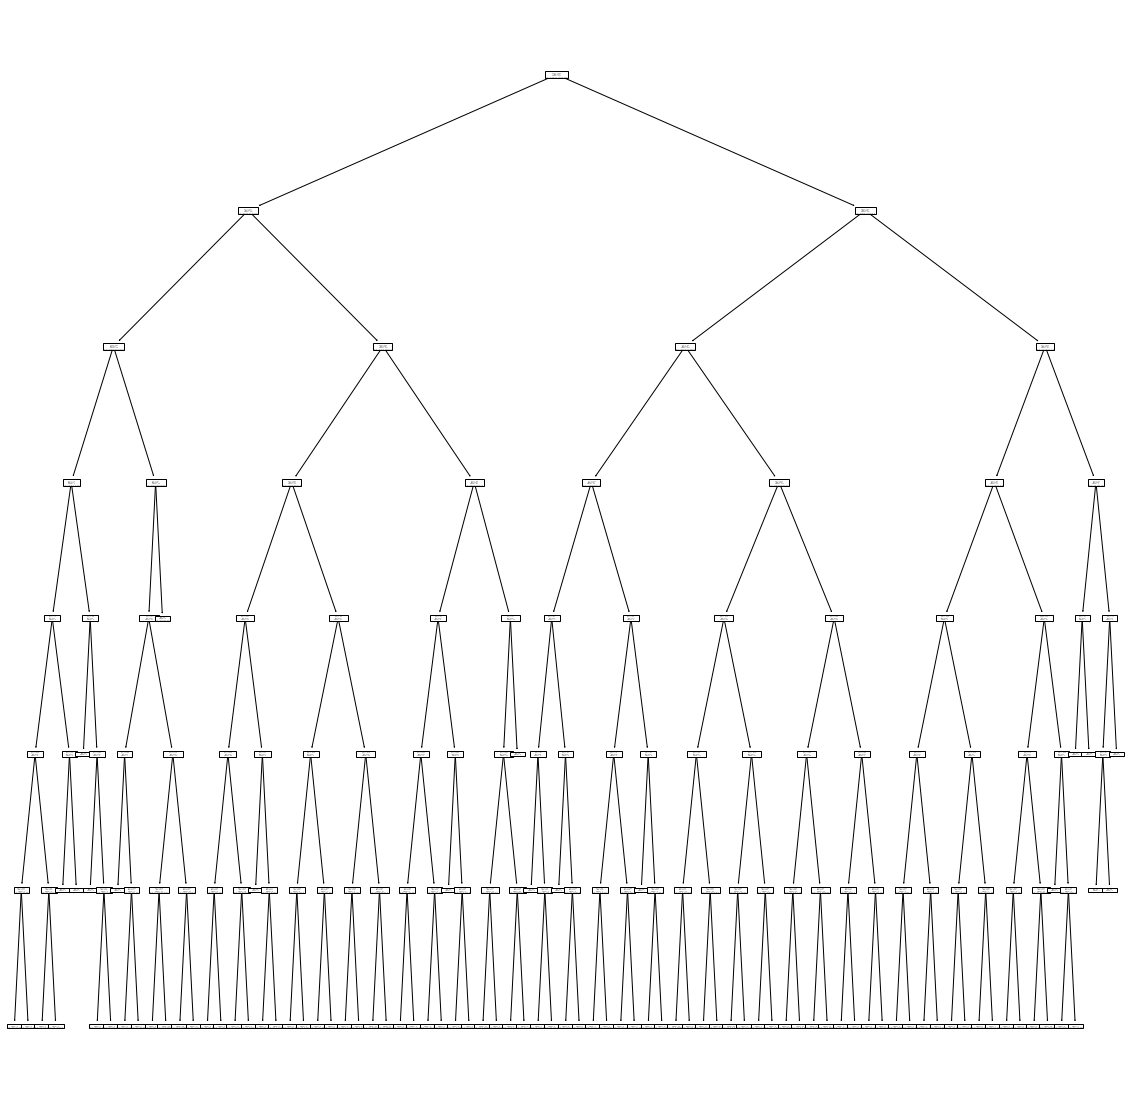

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(arbol_clasificacion_best_param_wine)
plt.show()

#### Cross-validation del modelo KNeighborsClassifier para el caso de la data de winequality-white.csv

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the KNeighborsClassifier model
modelo_KNN_classifier = KNeighborsClassifier()

# Define the hyperparameter grid for KNeighborsClassifier
cuadricula_parametros_KNN = {'n_neighbors': range(2, 9)}

# Create an instance of RandomizedSearchCV
buscadorRandom_KNN = RandomizedSearchCV(modelo_KNN_classifier, cuadricula_parametros_KNN, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object on the training data
buscadorRandom_KNN.fit(X_train_tabla_wine, y_train_tabla_wine)

# Print the best parameters and best score
print("Best Parameters:", buscadorRandom_KNN.best_params_)
print("Best Score:", buscadorRandom_KNN.best_score_)


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 5}
Best Score: 0.47396395339745095


#### Cross-validation del modelo GaussianNB para el caso de la data de winequality-white.csv

In [ ]:
from sklearn.naive_bayes import GaussianNB


modelo_NB_Gaussian = GaussianNB()
modelo_NB_Gaussian.fit(X_train_tabla_wine,y_train_tabla_wine)
